In [329]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

## Task 1

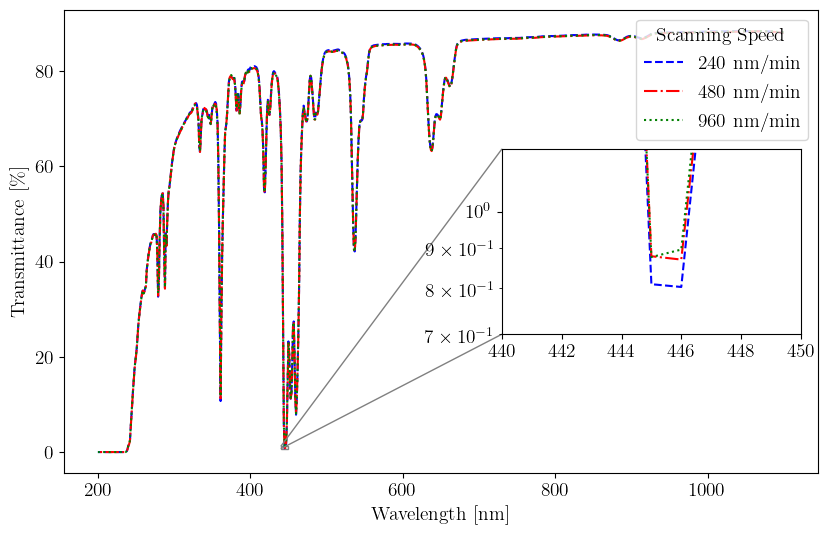

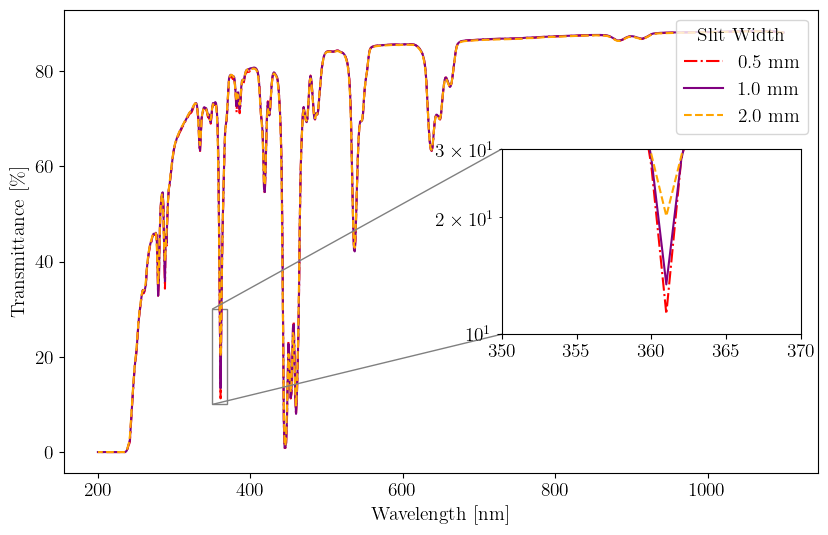

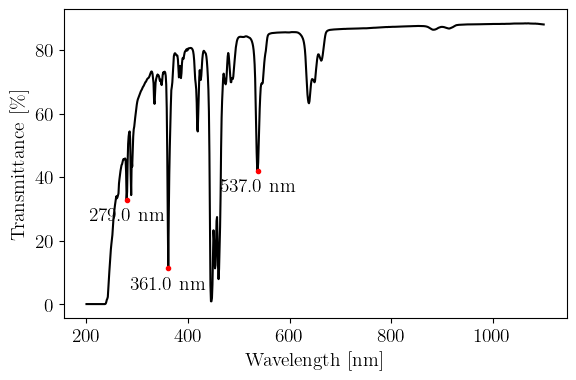

In [330]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 1')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace(',', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))

# Initialize the list of data for files with 05 in the file name
data_05 = []

# Initialize the list of data for files with 480 in the file name
data_480 = []

# Loop through the data
for file_name, file_data in data:
    # Check if the file name contains 05
    if '05' in file_name:
        # Append the file data to the data_05 list
        data_05.append((file_name, file_data))
    
    # Check if the file name contains 480
    if '480' in file_name:
        # Append the file data to the data_480 list
        data_480.append((file_name, file_data))

# Define linestyles and colors for specific file names
style_map = {
    '05_240': {'linestyle': '--', 'color': 'blue'},
    '05_480': {'linestyle': '-.', 'color': 'red'},
    '05_960': {'linestyle': ':', 'color': 'green'},
    '10_480': {'linestyle': '-', 'color': 'purple'},
    '20_480': {'linestyle': '--', 'color': 'orange'}
}

# Plot the data for files with 05 in the file name
fig, ax = plt.subplots(figsize=set_size(469*1.5))
for file_name, file_data in data_05:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    style = style_map.get(base_name, {'linestyle': '-', 'color': 'black'})
    # Extract the number after 05_ and add 'nm/min'
    label = base_name.split('_')[1] + ' nm/min'
    ax.plot(x, y, label=label, linestyle=style['linestyle'], color=style['color'])


ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Scanning Speed', loc='upper right')

# Create inset of the zoomed region
ax_inset = inset_axes(ax, width="40%", height="40%", loc='center right', bbox_to_anchor=(0, 0, 0.99, 1), bbox_transform=ax.transAxes)
for file_name, file_data in data_05:
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    style = style_map.get(base_name, {'linestyle': '-', 'color': 'black'})
    label = base_name.split('_')[1] + ' nm/min'
    ax_inset.plot(x, y, linestyle=style['linestyle'], color=style['color'])
ax_inset.set_xlim(440, 450)
ax_inset.set_ylim(0.7, 1.2)
ax_inset.set_yscale('log')

# Add lines connecting the inset to the main plot
mark_inset(ax, ax_inset, loc1=2, loc2=3, fc="none", ec="0.5")

plt.show()

# Plot the data for files with 480 in the file name
fig, ax = plt.subplots(figsize=set_size(469*1.5))
for file_name, file_data in data_480:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    style = style_map.get(base_name, {'linestyle': '-', 'color': 'black'})
    # Extract the first two numbers and add a decimal point between them
    label = base_name.split('_')[0][0] + '.' + base_name.split('_')[0][1] + ' mm'
    ax.plot(x, y, label=label, linestyle=style['linestyle'], color=style['color'])


ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Slit Width', loc='upper right')

# Create inset of the zoomed region
ax_inset = inset_axes(ax, width="40%", height="40%", loc='center right', bbox_to_anchor=(0,0,0.99,1) ,bbox_transform=ax.transAxes)
for file_name, file_data in data_480:
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    style = style_map.get(base_name, {'linestyle': '-', 'color': 'black'})
    label = base_name.split('_')[0][0] + '.' + base_name.split('_')[0][1] + ' mm'
    ax_inset.plot(x, y, linestyle=style['linestyle'], color=style['color'])
ax_inset.set_xlim(350, 370)
ax_inset.set_ylim(10, 30)
ax_inset.set_yscale('log')

# Add lines connecting the inset to the main plot
mark_inset(ax, ax_inset, loc1=2, loc2=3, fc="none", ec="0.5")
plt.show()

# Extract data for the file 05_480
file_name = '05_480.asc'
file_data = next((fd for fn, fd in data if fn == file_name), None)

if file_data is not None:
    x = np.array([row[0] for row in file_data])
    y = np.array([row[1] for row in file_data])

    # Plot the data
    fig, ax = plt.subplots(figsize=set_size(469))
    ax.plot(x, y, color='black')
    ax.set_xlabel('Wavelength [nm]')
    ax.set_ylabel(r'Transmittance [$\%$]')

    # Find dips near the specified wavelengths
    target_wavelengths = [279.3, 360.8, 536.4]
    dip_indices = []
    for target in target_wavelengths:
        # Find the index of the closest wavelength to the target
        idx = (np.abs(x - target)).argmin()
        # Find dips in a small window around the target wavelength
        window = 2  # Adjust the window size if necessary
        dips, _ = find_peaks(-y[max(0, idx-window):min(len(y), idx+window)])
        # Adjust dip indices to the original data
        dip_indices.extend(dips + max(0, idx-window))

    # Highlight the identified dips
    ax.plot(x[dip_indices], y[dip_indices], '.', color='red')

    # Annotate the dips
    for idx in dip_indices:
        ax.annotate(f'{x[idx]:.1f} nm', (x[idx], y[idx]), textcoords="offset points", xytext=(0,-15), ha='center')

    plt.show()
else:
    print(f"File {file_name} not found.")



## Task 2

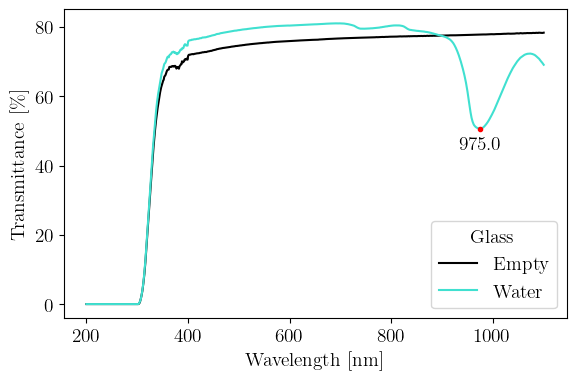

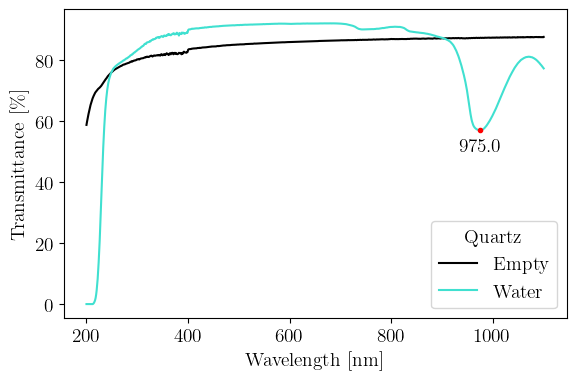

In [331]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 2')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace(',', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))

# Initialize the list of data for files with glass in the file
data_glass = []

# Initialize the list of data for files with quartz in the file
data_quartz = []

# Loop through the data
for file_name, file_data in data:
    # Check if the file name contains glass
    if 'glass' in file_name:
        # Append the file data to the data_glass list
        data_glass.append((file_name, file_data))
    
    # Check if the file name contains quartz
    if 'quartz' in file_name:
        # Append the file data to the data_quartz list
        data_quartz.append((file_name, file_data))

# Define colors for "Empty" and "Water"
color_empty = 'black'
color_water = 'turquoise'
color_default = 'gray'

# Function to find dips
def find_dips(y):
    # Invert the signal to find dips as peaks
    inverted_y = -np.array(y)
    peaks, _ = find_peaks(inverted_y, prominence=5)
    return peaks

# Plot the data for files with glass in the file name
fig, ax = plt.subplots(figsize=set_size(469))
for file_name, file_data in data_glass:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    label = base_name.split('_')[1]
    
    # Determine the color based on the file name
    if 'Empty' in file_name:
        color = color_empty
    elif 'Water' in file_name:
        color = color_water
        # Find dips
        dips = find_dips(y)
        # Annotate dips
        for dip in dips:
            ax.annotate(f'{x[dip]:.1f}', (x[dip], y[dip]), textcoords="offset points", xytext=(0,-15), ha='center')
    
    ax.plot(x, y, label=label, color=color)
ax.plot(np.array(x)[dips], np.array(y)[dips], '.', color='red') 

ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Glass', loc='lower right')

plt.show()

# Plot the data for files with quartz in the file name
fig, ax = plt.subplots(figsize=set_size(469))
for file_name, file_data in data_quartz:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]
    label = base_name.split('_')[1]
    
    # Determine the color based on the file name
    if 'Empty' in file_name:
        color = color_empty
    elif 'Water' in file_name:
        color = color_water
        # Find dips
        dips = find_dips(y)
        # Annotate dips
        for dip in dips:
            ax.annotate(f'{x[dip]:.1f}', (x[dip], y[dip]), textcoords="offset points", xytext=(0,-15), ha='center')
    
    ax.plot(x, y, label=label, color=color)
ax.plot(np.array(x)[dips], np.array(y)[dips], '.', color='red')

ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel(r'Transmittance [$\%$]')
ax.legend(title='Quartz', loc='lower right')

plt.show()



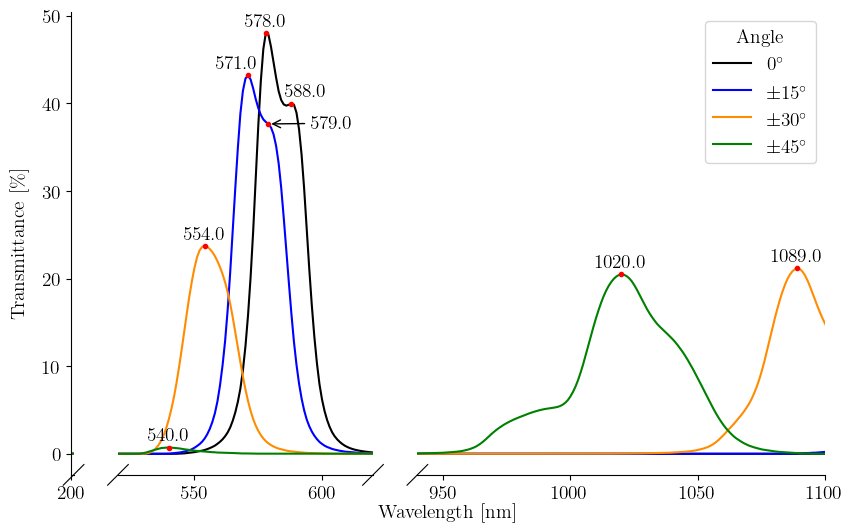

In [335]:
import numpy as np
import matplotlib.pyplot as plt
import os
from brokenaxes import brokenaxes
from scipy.signal import find_peaks

# Initialize the list of data for files with interference in the file
data_interference = []

# Loop through the data
for file_name, file_data in data:
    # Check if the file name contains interference
    if 'interference' in file_name:
        # Append the file data to the data_interference list
        data_interference.append((file_name, file_data))

# Plot the data for files with interference in the file name
fig = plt.figure(figsize=set_size(469*1.5))
bax = brokenaxes(xlims=((200, 201), (520, 620), (940, 1100)), hspace=0)

style_map = { 'interference_0': {'linestyle': '-', 'color': 'black'},
              'interference_15': {'linestyle': '-', 'color': 'blue'},
              'interference_30': {'linestyle': '-', 'color': 'darkorange'},
              'interference_45': {'linestyle': '-', 'color': 'green'}}

# Dictionary for annotation positions
annotation_positions = {
    'interference_0': {
        0: {'xytext': (10, 5)},
        1: {'xytext': (0, 5)},
    },
    'interference_15': {
        0: {'xytext': (-8, 5)},
    }
}

for file_name, file_data in data_interference:
    # Strip the file extension
    base_name = os.path.splitext(file_name)[0]
    x = [row[0] for row in file_data]
    y = [row[1] for row in file_data]

    if 'interference_0' in file_name:
        label = base_name.split('_')[1] + r'$^{\circ}$'
    else:
        label = r'$\pm$' + base_name.split('_')[1] + r'$^{\circ}$'
    
    bax.plot(x, y, label=label, linestyle=style_map.get(base_name, {'linestyle': '-', 'color': 'black'})['linestyle'], color=style_map.get(base_name, {'linestyle': '-', 'color': 'black'})['color'])
    
    # Find peaks
    peaks, _ = find_peaks(y, prominence=0.1)
    
    # Annotate peaks
    for i, peak in enumerate(peaks):
        xytext = annotation_positions.get(base_name, {}).get(i, {'xytext': (0, 5)})['xytext']
        bax.annotate(f'{x[peak]:.1f}', (x[peak], y[peak]), textcoords="offset points", xytext=xytext, ha='center')
        bax.plot(x[peak], y[peak], '.', color='red') 

    # Manually add peak label at x=579nm for interference_15
    if 'interference_15' in file_name:
        index_579 = np.argmin(np.abs(np.array(x) - 579))
        xytext = annotation_positions.get('interference_15', {}).get(index_579, {'xytext': (30, -3)})['xytext']
        bax.annotate('579.0', (x[index_579], y[index_579]), textcoords="offset points", xytext=xytext, ha='left',
                     arrowprops=dict(facecolor='black', arrowstyle='->'))
        bax.plot(x[index_579], y[index_579], '.', color='red')

bax.set_xlabel('Wavelength [nm]', labelpad=20)
bax.set_ylabel(r'Transmittance [$\%$]')
bax.legend(title='Angle', loc='upper right')

plt.show()